In [1]:
import os
import mlflow
import numpy as np
import pandas as pd

from math import sqrt
from joblib import delayed
from joblib import Parallel

from warnings import catch_warnings
from warnings import filterwarnings
from multiprocessing import cpu_count
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from pathlib import Path
from functools import reduce
from datetime import datetime

from prophet import Prophet

import random
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from regressors import stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./covid_measurements_main.csv', converters={'ags2': str, 'ags5': str} )

In [3]:
#avarage each variable 
df_mean = df.groupby(['date']).mean()
df_mean = df_mean.reset_index(drop=False)

In [5]:
def plot_covid_mean(column):
    plt.figure()
    g = sns.lineplot(data=df_mean, x="date", y=column)
    g.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    g.set_title(col)
    g.set(xlabel='Date', ylabel='Proportion of kreise')

<ipython-input-5-9c852951b9e7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


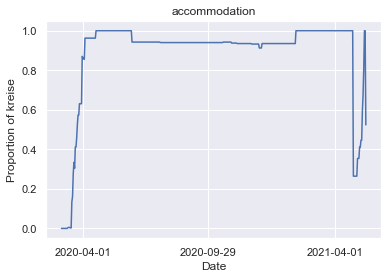

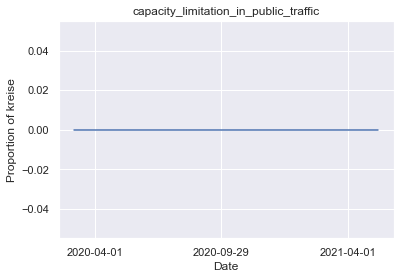

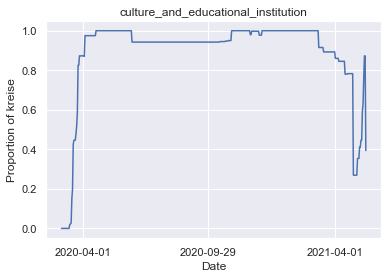

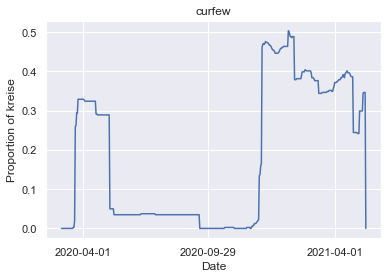

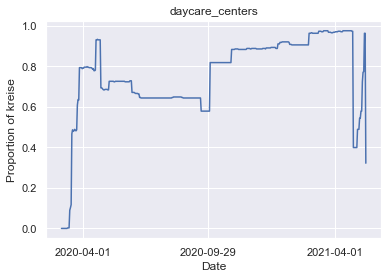

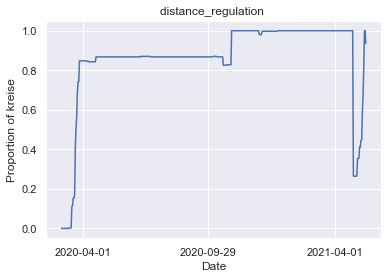

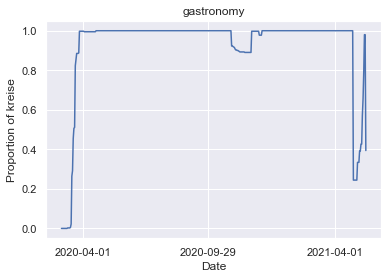

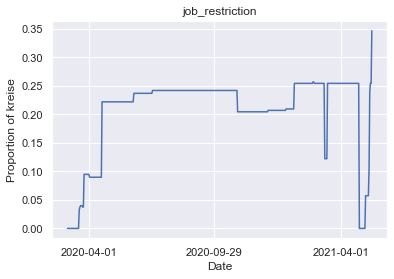

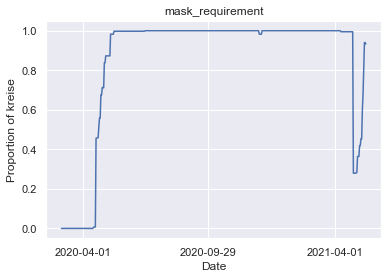

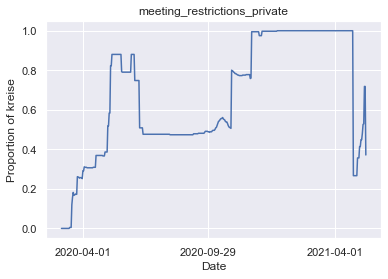

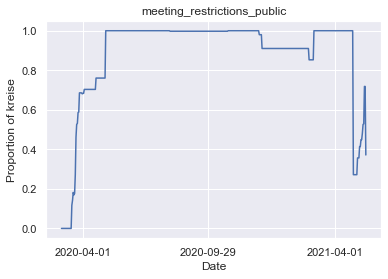

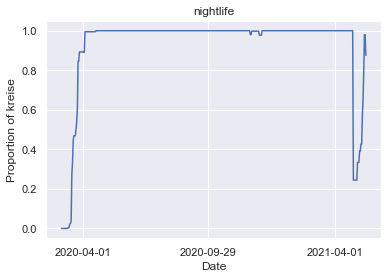

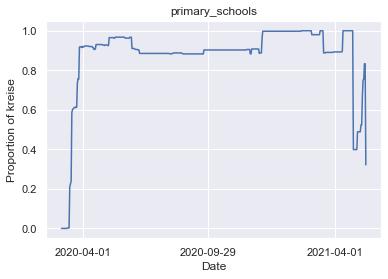

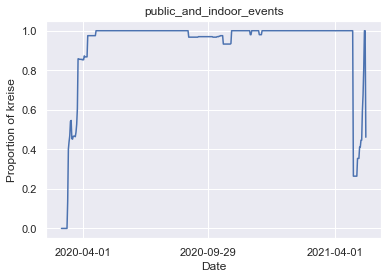

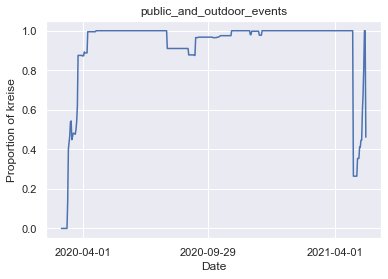

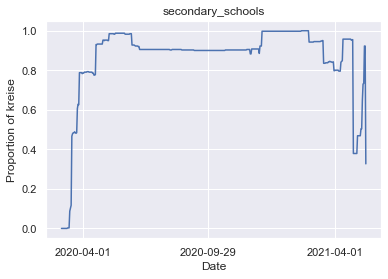

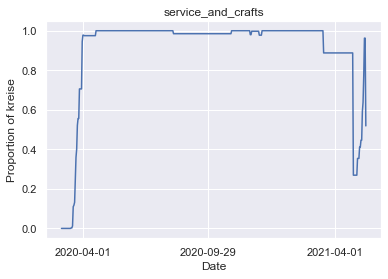

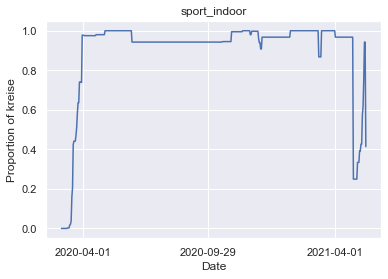

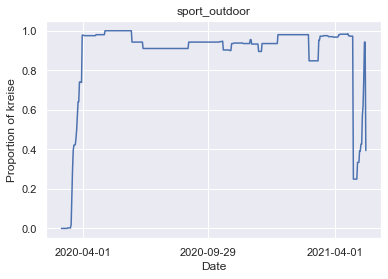

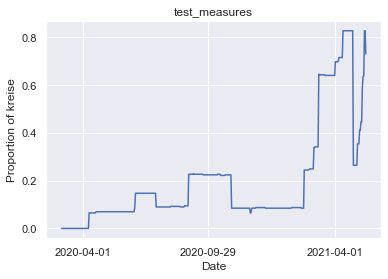

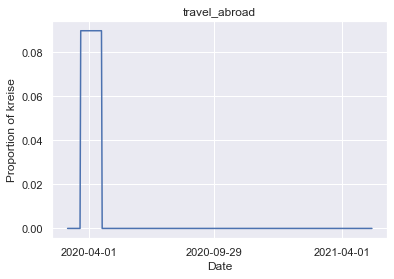

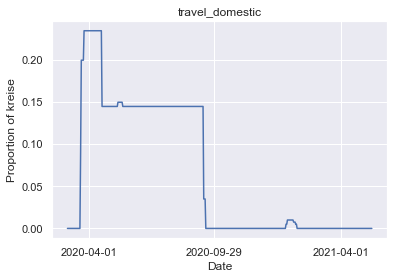

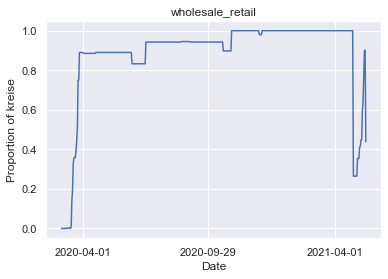

In [6]:
c =    ['accommodation',
       'capacity_limitation_in_public_traffic',
       'culture_and_educational_institution', 'curfew', 'daycare_centers',
       'distance_regulation ', 'gastronomy', 'job_restriction',
       'mask_requirement', 'meeting_restrictions_private',
       'meeting_restrictions_public', 'nightlife', 'primary_schools',
       'public_and_indoor_events', 'public_and_outdoor_events',
       'secondary_schools', 'service_and_crafts', 'sport_indoor',
       'sport_outdoor', 'test_measures', 'travel_abroad', 'travel_domestic',
       'wholesale_retail']
for col in c: 
    plot_covid_mean(col)